# Training Linear Models
This Notebook explains the concepts behind the algorithms of the Linear systems family, breaks-down and explains their mathematical terms as well as their cost-functions to determine their ideal parameters. 

The goal of this Notebook is a comprehensive but easy-to-understand Notebook of all algorithms listed below, as well as how to tweak them to unlock those black-boxes and fully discover their potential.

The Usefulness of this Notebook is determined by applying the concepts to real-world problems like the modeling of Realestate properties.

This Notebook is based on:
- Coursera: IBM Professional Certification in Data Science
- Coursera: Machine Learning Spezialisation by Andrew Ng
- O'Reilly: Essential Math for Data Science
- O'Reilly: Hands-On Machine Learning with Scikit-Learn, Keras & Tensorflow

This Notebook uncovers blackboxes of machine learning algorithms, which include:
1. Linear Regression
2. Gradient Descent
- Batch Gradient Descent
- Stochastic Gradient Descent
- Mini-batch Gradient Descent
3. Polynomial Regression
- Learning Curves
4. Regularized Linear Models
- Ridge Regression
- Lasso Regression
- Elastic Net Regression
- Early Stopping
5. Logistic Regression
- Decision Boundaries
- Softmax Regression


# 1. Linear Regression

### Linear regression model prediction
$$\hat{y} = \theta_0 +\theta_1x_1+\theta_2x_2+ ... + +\theta_nx_n$$
Where:
- $\hat{y}$ is the predicted values -> always expressed as $f(x)$
- $n$ is the number of features
- $x_i$ is the $i^{th} feature$
- $\theta{j}$ is the $j^{th}$ model parameter, including the bias term $\theta_0$ and the feature weights $\theta_1, \theta_2, ..., \theta_n$

This can be expressed in 
### Vectorized Form
$$\hat{y} = h_{\theta}(x) = \theta \cdot{x}$$
Here:
- $h_{\theta}$ is the hypothesis function, using the models parameters $\theta$
- $\theta$ is the model's parameter vector containing $\theta_1, \theta_2, ..., \theta_n$ and $\theta_0$
- $x$ is the feature vector, containing $x_0, x_1, ..., x_n$
- $\theta \cdot{x}$ is the dot product of the vectors which equal to $\theta_0 +\theta_1x_1+\theta_2x_2+ ... + +\theta_nx_n$

### Cost Function (Mean Squared Error MSE) for a linear regression model
$$MSE(X, h_{\theta}) = \frac{1}{m} \sum_{i=1}^m(\theta^Tx^{(i)} - y^{(i)})^2$$
Where:
- $m$ -> number of observations (data points)
- $\theta^Tx^{(i)}$ = $\hat{y}$ -> predicted value

## 1.1 The Normal Equation
We compute what value of $\theta$ that minimizes our MSE using a _closed-form solution_. This means we calculate the best $\theta$ using a mathematical equation:
$$\hat{\theta} = (X^TX)^{-1}X^Ty$$
Where:
- $\hat{\theta}$ is a vector of $\theta$ that minimises the cost function
- $y$ is the vector of target values (containing $y^{(1)}$ to $y^{(m)}$)

In [1]:
# Import all necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import add_dummy_feature
from sklearn.linear_model import LinearRegression

Next, we will compute this normal equation:

We create a function $f_x(x^{(i)}) = \hat{y}^{(i)}$ = $4 + 3X + noise$ .

The below code will generate our target variable $f(x)$ as `y` , our feature matrix `X` and `m` will represent the number of observations (data points) in our dataset. Please note:
- for X: `np.random.rand(m,1)` generates a uniform distribution over the interval [0,1) -> Every number between 0(inclusive) and 1(exclusive), results into a 100x1 array where each number is between 0 and 1
- for y: `np.random.randn(m,1)` generates a standard deviation normal distribution with a mean of 0 and standard deviation of 1. We use `randn()` to introduce noise to `y` -> noise generated using standard normal distributed data is more realistic

In [6]:
# Creating synthetic data for Linear Regression
np.random.seed(42) # to make code reproducible
m = 100             # All our data points
X = 2 * np.random.rand(m,1)     # Our input feature matrix (technically a vector, but here matrix as there is one feature with one column)
y = 4+3 * X + np.random.randn(m,1) # function is 4 + 3X + Gaussian noise

We visualise our plot.

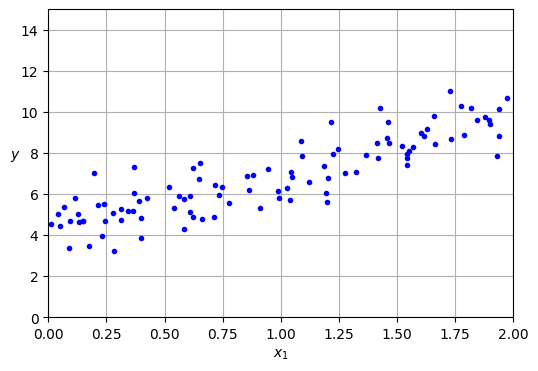

In [9]:
plt.figure(figsize=(6,4))
plt.plot(X,y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0,2,0,15])
plt.grid()
plt.show()

Our bias $\theta_0$ is a constant 4, this is just our intercept crossing the y-axis at y=4. This is hard to see here due to the noise $e$. </br>$\theta_1$ or our slope is 3 multiplied by feature $x_i$.

`add_dummy_feature(X)` will include $\theta_0$ to each $x_i$. You want to add (whenever training a model manually) it whenever the linear regression model has an intercept (which is almost always).

In [ ]:
# Let's compute our intercept and slope 
X_b = add_dummy_feature(X) # add x0 = 1 to each instance to explicity include the bias term
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y # (X(t) * X) * X(t) * y
theta_best

array([[4.21509616],
       [2.77011339]])

We hoped for theta0 = 4 and theta1 = 3, but instead got theta0 = 4.215 and theta1 = 2.77 due to the noise.
Now we can make a prediction using theta_hat:

In [161]:
# Predict theta_hat
X_new = np.array([[0],[2]]) # Range of feature x
X_new_b = add_dummy_feature(X_new) # Add x0 = 1 for matrix multiplication
y_predict = X_new_b @ theta_best # Mult feature x to intercept and slope X_new
y_predict   # What is yhat with feature x = 0 and yhat with feature x = 2 (range of our regression line)

array([[4.21509616],
       [9.75532293]])

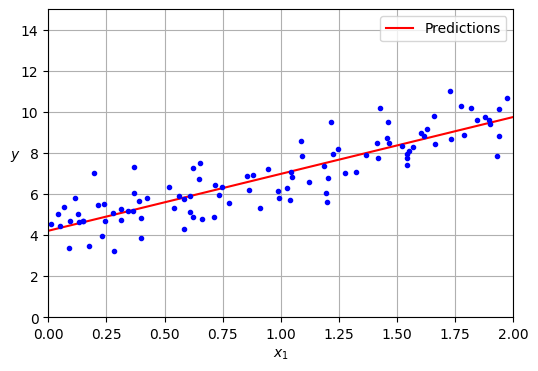

In [162]:
# Let's plot the model
plt.figure(figsize=(6,4))
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X,y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0,2,0,15])
plt.legend()
plt.grid()
plt.show()

#### The Normal Equation using Sklearn Packages
`LinearRegression()` is able to perform the above manual steps automatically.

In [ ]:
# Building a linear model
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_ # Get the intercept and slope of feature X

(array([4.21509616]), array([[2.77011339]]))

In [164]:
lin_reg.predict(X_new) # Get the prediction and end of the regression line

array([[4.21509616],
       [9.75532293]])

### SVD method

LinearRegression class is based on the scipy.linalg.lstsq() function (the name stands for "least squares"), which you could call directly:

In [165]:
# Option 3 of getting the intercept and slope of a linear regression
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd          

array([[4.21509616],
       [2.77011339]])

Calculating intercept and slope using the pseudoinverse of X.

This function computes **𝑋⁺𝑦**, where **𝑋⁺** is the *pseudoinverse* of **𝑋** (specifically the Moore-Penrose inverse). You can use np.linalg.pinv() to compute the pseudoinverse directly:

In [166]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

# 2. Gradient Descent
## 2.1 Batch Gradient Descent
- Must use GD for Linear Regression as the function will find the best parameter due to its convex shape (hemmock-like shape, no hills)
- Will eventually find convergence IF the learning rate is not too high

We need to calculate how much the cost function will change if we change theta0 just a little bit. This is called a partial derivative. To note are two formulars:
1. Partial derivatives of a cost function

$\frac{\partial}{\partial \theta_j}MSE(\theta) =  \frac{2}{m} \sum_{i=1}^{m} (\theta^Tx^{(i)} - y^{(i)})x_{j}^{(i)}$ 

Instead of calculating each partial derivative individually, we can use the

2. Gradient vector of the cost function:

$\nabla_{\theta} MSE(\theta) = \frac{2}{m}X^T(X\theta-y)$


3. Gradient descent step

$\theta := \theta - \alpha \nabla_{\theta} MSE(\theta)$

In [ ]:
# Implementation of this algorithm
eta = 0.1           # Learning rate
n_epochs = 1000     # Iteration 
m = len(X_b)        # Length of all values

np.random.seed(42)  # Reproducibility 
theta = np.random.randn(2,1) # randomly initialized model parameters

for epoch in range(n_epochs):
    gradients = 2/m * X_b.T @ (X_b @ theta - y) # Calculate the gradients -> calculation 2
    theta = theta - eta * gradients # Gradient descent step -> calculation 3

theta

array([[4.21509616],
       [2.77011339]])

We visualise the effect of different learning rates. 
1. Too small
2. Just right
3. Too big

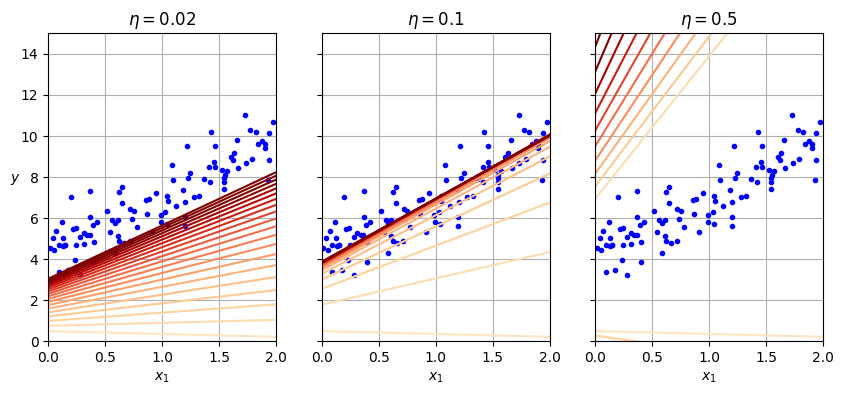

In [168]:
# Visualise the process
import matplotlib as mpl
def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)
plt.show()

n = 0.02 is too small (too many steps), n=0.1 is perfect, n=0.5 misses the LR line.

## 2.2 Stochastic Gradient Descent
We will add a `learning_schedule` .
1. Define learning schedule hyperparameters `t0`, `t1`
2. Define a `learning_schedule(t): return t0 / (t + t1)`
3. Amend the Gradient vector of the cost function to match SGD (we don't divide by m)

$\nabla_{\theta} MSE(\theta) = 2X^T(X\theta-y)$

In [169]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

for epoch in range(n_epochs):
    for iteration in range(m):

        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients

In [170]:
theta

array([[4.21076011],
       [2.74856079]])

In [171]:
# Using SGDRegressor function
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expects 1D targets

sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

## 2.3 Mini-batch gradient descent
Mini-batch GD computes the gradients on small random sets of instances called _mini-batches_. 
- You get a performance boost from hardware optimization of matrix operations
- Ends up having closer values to the actual minimum that stochastic GD
- Harder to escape local minimum than stochastic GD, but better than batch GD.

# 3. Polynomial Regression
Fit a linear model to fit nonlinear data. Simple way is to add powers of each feature as new features, then train a linear model on this extended feature set.

Simple _quadratic equation_: $y = 0.5x^2 + x + 2 + np.random.randn(m,1)$</br>
OR:
$$\hat{y} = \theta_0 +\theta_1x_1^2+\theta_2x_2+ ... + +\theta_nx_n+e$$
Where:
- $e$ = noise

In [16]:
# Define a polynomial target function y and feature vector X
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

In [17]:
# Transform the data using PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X) 
X_poly[0]       # X_poly contains the original feature of X and the squared features (by degree = 2)

array([-0.75275929,  0.56664654])

In [18]:
# We can now fit a LinearRegression model to this extended training data
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

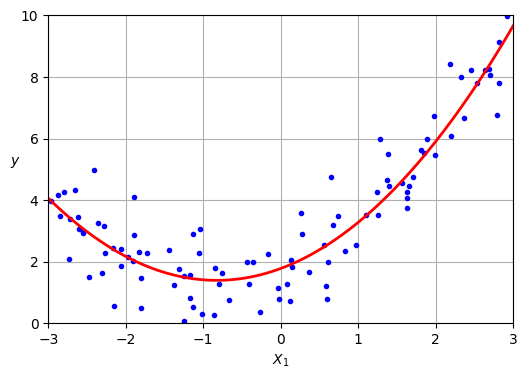

In [19]:
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

# Plot the new function
plt.figure(figsize=(6,4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.grid()
plt.xlabel("$X_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3,3,0,10])
plt.show()

Model estimated: $yhat = 0.56x_1^2 + 0.93x_1 + 1.78$

Actual: $yhat = 0.5x_1^2 + 1.0x_1 + 2.0$

## 3.1 Learning Curves
- Plots of the model's training error and validation error as a function of the training iteration. It evaluates the model at regular intervals during training on both the training and validation set
- Use `learning_curve()`: It trains and evaluates the model using cross-validation.
- By default, it retrains the model on growing subsets of the training set, but if the model supports incremental learning you can set `exploit_incremental_learning=True` and it will train the model incrementally instead
- function returns the training set sizes at which it evaluates the model, and the training and validation scores it measured for each size and for each cross-validation fold

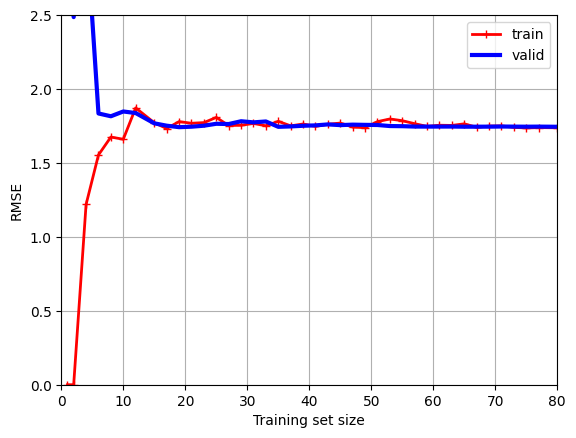

In [176]:
# Use the function to look at the learning curve of the plain linear regression model
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5, scoring='neg_root_mean_squared_error')
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label='train')
plt.plot(train_sizes, valid_errors, 'b-', linewidth=3, label='valid')
plt.axis([0,80,0.0,2.5])
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.legend(loc='upper right')
plt.grid()
plt.show()

If the data is building a plateu, it's a sign of underfitting the data. A more complex must be used. Increasing the feature size won't change the models performance.

In [177]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression()
)

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring='neg_root_mean_squared_error'
)

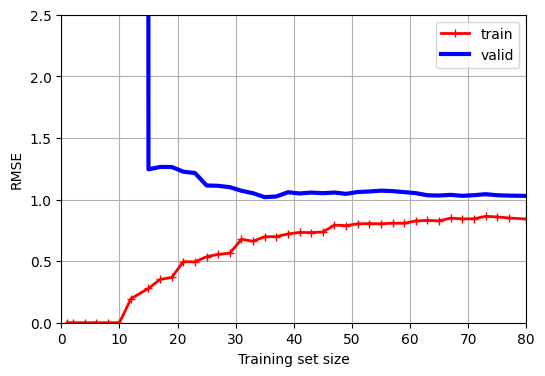

In [178]:
# Plot the data
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, 80, 0, 2.5])
plt.show()

A gap is indicates the model is overfitting the data. RMSE is lower on the training and validation set as before though. Feeding more training data helps to align an overfitting model.

**The Bias/ Variance Trade-Off (p. 155)**

Models generalization error can be expressed in three different errors:
1. Bias 
- Due to wrong assumptions, such as assuming that the data is linear when it is actually quadratic. High-bias model is most likely to underfit the training data.
2. Variance 
- Due to the model's excessive sensitivity to small variations in the trainin data. Model with many degrees of freedom (such as high-degree polynomial model) is likely to have high variance and thus overfit the training data
3. Irreducible error
- Due to the noisiness of the data itself.

# 4. Regularized Linear Models

## 4.1 Ridge Regression
- Regularized version of LR to prevent overfitting
- Adds a penalty $\alpha$ to the model's coefficients $\theta$ (the weights assigned to each feature), that discourages the model from assigning large weights to any particular feature (simplyfying the model)

$$\frac{\alpha}{m} \sum_{j=1}^{n} \theta_j^2$$

- $\alpha$ is the regularization strenght

### Ridge Regression Cost Function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2 + \frac{\alpha}{m} \sum_{j=1}^{n} \theta_j^2$$
Where:
- $m$  = number of training examples.
- $h_{\theta}(x) = X\theta$  is the predicted value.
- $y^{(i)}$  = true value.
- $\lambda \sum_{j=1}^{n} \theta_j^2$  = regularization term (shrinks weights).


In [179]:
# Generate a very small and noisy linear dataset
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

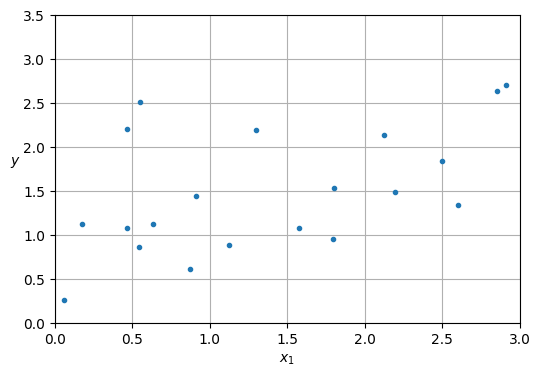

In [180]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, ".")
plt.xlabel("$x_1$")
plt.ylabel("$y$  ", rotation=0)
plt.axis([0, 3, 0, 3.5])
plt.grid()
plt.show()

In [181]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([1.55325833])

In [182]:
# Using stochastic gradient descent
sgd_reg = SGDRegressor(penalty='l2', alpha=0.1/m, tol=None, max_iter=1000, eta0=0.01, random_state=42)

## Lasso Regression
Least Absolute Shrinkage and Selection Operator
- Instead of the sum of squared weights (like Ridge), Lasso uses the sum of **absolute values** of the weights
- **Lasso can eliminate some of the least important features by forcing their coefficients to exactly zero**
- **it automatically performs feature selection and outputs a _sparse model_ with few nonzero feature weights**

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2 + 2\alpha \sum_{j=1}^{n} |\theta_j|$$


where:
- $m$  = number of training examples
- $h_{\theta}(x) = X\theta$  = predicted value
- $y^{(i)}$  = true value
- $2\alpha \sum_{j=1}^{n} |\theta_j|$  = L1 penalty, which reduces some coefficients to zero

#### Differences to Ridge Regression:
- L1 vs. L2 Norm in Regularization
- Lasso Regression uses the L1 norm ($\ell_1$), which is the sum of absolute values of the weights:

$$\|\theta\|1 = \sum{j=1}^{n} |\theta_j|$$

This causes some weights to shrink to exactly zero (feature selection).

Ridge Regression uses the L2 norm ($\ell_2$), which is the sum of squared weights:

$$\|\theta\|2^2 = \sum{j=1}^{n} \theta_j^2$$

This shrinks weights but does not set them to zero.

#### The problem with Lasso and Gradient Descent
- Lasso is Not Differentiable at $\theta_j = 0$,
- Subgradient descent extends gradient-based optimization to non-differentiable functions

In [183]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [184]:
# Or
sgd_clf = SGDRegressor(penalty='l1', alpha=0.1)

## Elastic Net

Elastic Net is a regularized regression model that combines both Ridge Regression (L2 regularization) and Lasso Regression (L1 regularization). It is useful when you have many correlated features and need both feature selection (L1) and weight shrinkage (L2).

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2 + r(2\alpha \sum_{j=1}^{n} |\theta_j|) + (1+r)(\frac{\alpha}{m} \sum_{j=1}^{n} \theta_j^2)$$

- When $r = 0$, elastic net is equivalent to ridge regression
- When $r = 1$, elastic net is equivalent to lasso regression

Generally speaking, always have a little bit of a regulator in your model - avoid plain LinearRegression. 
- Ridge is a good default
- If only a few features are useful prefer lasso regression or elastic net -> they reduce the useless features weights down to zero
- Elastic net is prefered over lasso, lasso might behave erratically when features is greater than number of training instances or several features are strongly correlated

In [185]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

## Early Stopping

Stops training as soon as the validation error reaches a minimumm when training a complex model. As the iterations go by, the algorithm learns along with its prediction error on the validation set. As soon as the validation error stops decreasing and starts to go back up, the model stops as overfitting sets in.
- Harder to use for stochastic and mini-batch GD, solution is a training stop when the validation error fails to improve for a specified number of iterations (patience parameter)

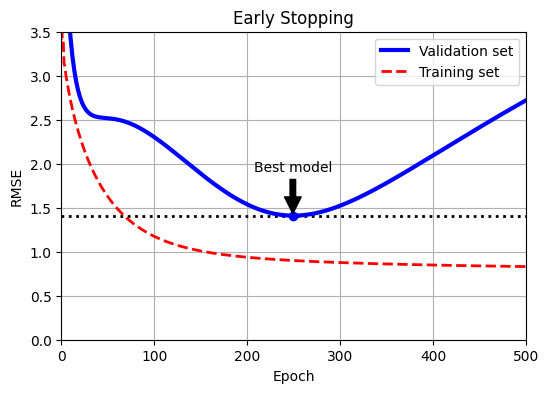

In [200]:
# Basic implementation of early stopping
from copy import deepcopy   # used to store the best model (prevents overwriting)
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import root_mean_squared_error

np.random.seed(42)
m = 100 # number of samples
X = 6 * np.random.rand(m, 1) - 3 # generates values between -3 and 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1) # quadratic function with noise
X_train, y_train = X[: m // 2], y[: m // 2, 0] # first 50 for training
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0] # last 50 for validation

preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False), # degree = 90 is a highly complex model
                              StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train) 
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)  # LR using stochastic GD with no penalty(l1 or l2) and small learning rate
n_epochs = 500
best_valid_rmse = float('inf') # initialize best validation RMSE to a very high value
train_errors, val_errors = [], []  # extra code – it's for the figure below

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train) # partial_fit enables incremental learning
    y_valid_predict = sgd_reg.predict(X_valid_prep) # predict validation set
    val_error = root_mean_squared_error(y_valid, y_valid_predict) # compute RMSE
    if val_error < best_valid_rmse: # if validation error improves
        best_valid_rmse = val_error # update best validation error
        best_model = deepcopy(sgd_reg) # copies the models hyperparameter and the learned parameters
        
    # extra code – we evaluate the train error and save it for the figure
    y_train_predict = sgd_reg.predict(X_train_prep)
    train_error = root_mean_squared_error(y_train, y_train_predict)
    val_errors.append(val_error)
    train_errors.append(train_error)
    
# extra code – this section generates and saves Figure 4–20
best_epoch = np.argmin(val_errors)
plt.figure(figsize=(6, 4))
plt.annotate('Best model',
             xy=(best_epoch, best_valid_rmse),
             xytext=(best_epoch, best_valid_rmse + 0.5),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([0, n_epochs], [best_valid_rmse, best_valid_rmse], "k:", linewidth=2)
plt.plot(val_errors, "b-", linewidth=3, label="Validation set")
plt.plot(best_epoch, best_valid_rmse, "bo")
plt.plot(train_errors, "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.axis([0, n_epochs, 0, 3.5])
plt.grid()
plt.title("Early Stopping")
plt.show()

# Logistic Regression
Typically estimates the probability that an instance belongs to a particular class. If the estimated instance is greater than a threshold (typically 50%) it belongs to class (positive class "1"), is it below that instance to the negative class "0".

**Logistic Regression model estimated probability (vectorized form)**
$$\hat{p} = h_\theta(x) = \sigma(\theta^Tx)$$

IMPORTANT: $h_\theta(x)$ is not the same as before.

$\sigma(t) = \frac{1}{1 + exp(-t)}$

It plotted:

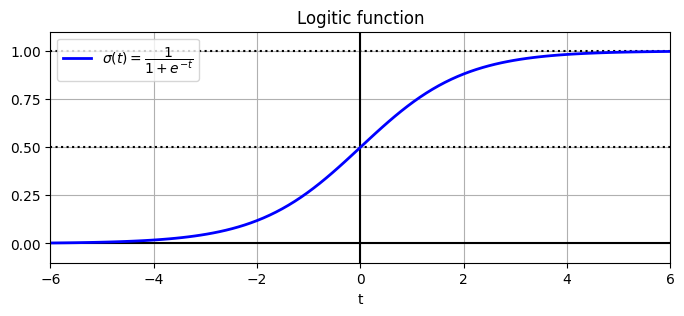

In [199]:
lim = 6 
t = np.linspace(-lim,lim,100)
sig = 1/(1+np.exp(-t))

plt.figure(figsize=(8, 3))
plt.plot([-lim, lim], [0, 0], "k-")
plt.plot([-lim, lim], [0.5, 0.5], "k:")
plt.plot([-lim, lim], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \dfrac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc='upper left')
plt.axis([-lim, lim, -0.1, 1.1])
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.grid()
plt.title("Logitic function")
plt.show()

### Decision Boundaries
Building a classifier that detect the Iris virginia type only on the petal width feature.

In [214]:
from sklearn.datasets import load_iris
iris_data = load_iris(as_frame=True)

In [218]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = iris_data.data[['petal width (cm)']].values          # Get all petal width cm values
y = iris_data.target_names[iris_data.target] == 'virginica'      # If virginica then 1, otherwise 0
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)     

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

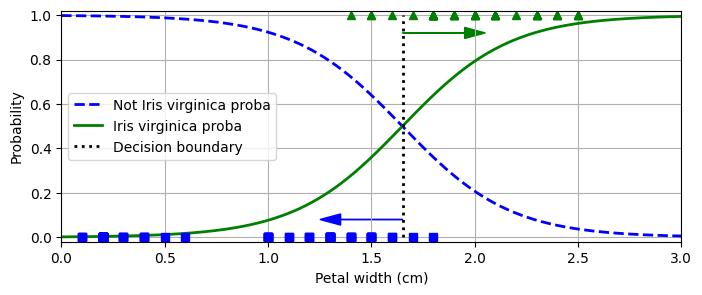

In [231]:
# Plot the estimated probabilities and decision boundary
X_new = np.linspace(0,3,1000).reshape(-1, 1)            # reshape to column vector
y_proba = log_reg.predict_proba(X_new)                  # Predicting probability of class 0 y_proba[0] and class 1 y_proba[1]
decision_boundary = X_new[y_proba[:,1] >= 0.5][0, 0]

plt.figure(figsize=(8, 3))
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")

plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()
plt.show()

In [232]:
decision_boundary

np.float64(1.6516516516516517)

In [233]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

Logistic Regression regularisation is similar to Ridge Ression in LR. It adds a penalty function that minimizes $\theta_j$.

In [234]:
# Regularization term for logstiic regression
LogisticRegression(C='l2')

LogisticRegression(C='l2')

# Softmax Regression
Used to generalize multiple classes directly, without having to train and combine multiple binary classifiers. Predicts only one class at a time (it is multiclass), so it should be used only with mutually exclusive classes, such as different species of plants.

$$\hat{p}_k = \sigma(s(x))_k = \frac{exp(s_k(x))}{\sum^K_{j=1} exp(s_j(x))}$$
- $K$ is the number of classes
- $s(x)$ is a vector containing the scores of each class for the instance $x$
- $\sigma(s(x))_k$ is the estimated probability that the instance $x$ belongs to class $k$, given the scores of each class for that instance

#### Cross entropy cost function
$$J(\theta) = -\frac{1}{m} \sum_{k=1}^K y_k^{i} log(\hat{p}_k^{(i)})$$
- $m$ = Sum of all observations
- $K$ = Sum of all classes
- $k$ = Single class
- $y_k^{i}$ = actual $target^{(i)}$ probability -> either 0 or 1
- $\hat{p}_k^{i}$ -> $predicted$ $target^{(i)}$

#### Cross entropy gradient vector for class k
$$\nabla_\theta^{(k)} J(\theta) = \frac{1}{m} \sum_{i=1}^m (\hat{p}_k^{(i)} - y_k^{(i)})x^{(i)}$$

Using the softmax regression to classify the iris plants into all three classes. Logistic Regression uses it automatically when trying to train it on more than two classes (when `solver="lbfgs"`). It also applies `l2` by default , which can be controlled using the hyperparameter `C`.

In [241]:
X = iris_data.data[["petal length (cm)", "petal width (cm)"]].values
y = iris_data["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

In [242]:
softmax_reg.predict([[5, 2]])

array([2])

In [244]:
softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.04, 0.96]])

This means an iris with petals that are 5cm long and 2cm wide is class 2. `predict_proba` tells is it is 0% class 0, 4% class 1 and 96% class 2.

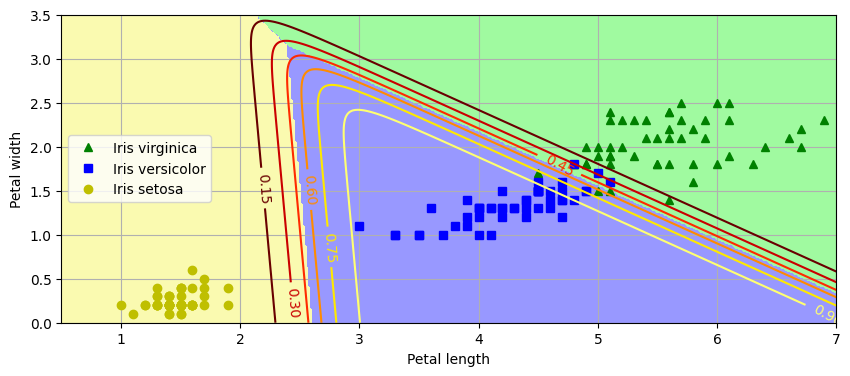

In [245]:
# extra code – this cell generates and saves Figure 4–25

from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="center left")
plt.axis([0.5, 7, 0, 3.5])
plt.grid()
plt.show()